In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

Matplotlib is building the font cache; this may take a moment.


In [8]:
data_file =r"C:\Users\hp\Desktop\project\genomic_data.csv"
if not os.path.exists(data_file):
    raise FileNotFoundError(f"The file '{data_file}' does not exist. Please provide the correct path.")

data = pd.read_csv(data_file)

In [9]:
print("Dataset Info:")
data.info()
print("\nFirst few rows of the dataset:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gene_ID           100 non-null    object 
 1   Expression_Level  100 non-null    float64
 2   GC_Content        100 non-null    float64
 3   Chromosome        100 non-null    object 
 4   Mutation_Count    100 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB

First few rows of the dataset:
  Gene_ID  Expression_Level  GC_Content Chromosome  Mutation_Count
0  Gene_1         54.967142   46.696440       chr2               2
1  Gene_2         48.617357   38.884312       chrY               4
2  Gene_3         56.476885   34.794615       chr1               4
3  Gene_4         65.230299   43.504607       chrX               4
4  Gene_5         47.658466   67.716388       chr1               2


In [10]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


In [11]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Expression_Level  GC_Content  Mutation_Count
count        100.000000  100.000000      100.000000
mean          48.961535   49.448247        5.160000
std            9.081684   11.525757        2.477046
min           23.802549   30.202463        0.000000
25%           43.990943   39.651188        4.000000
50%           48.730437   50.295442        5.000000
75%           54.059521   57.787046        7.000000
max           68.522782   69.426018       12.000000


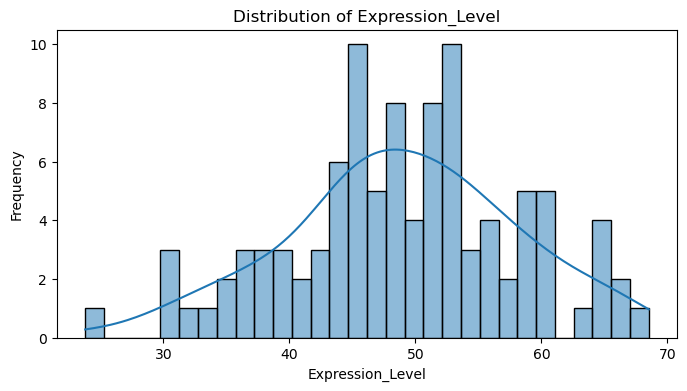

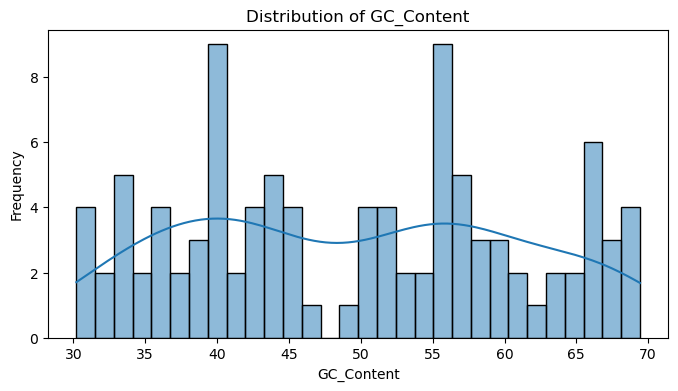

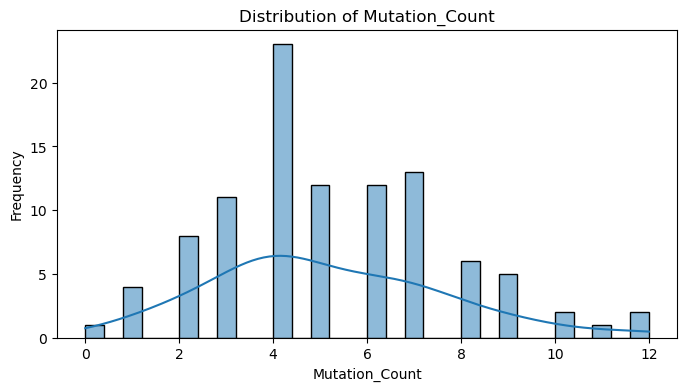

In [12]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

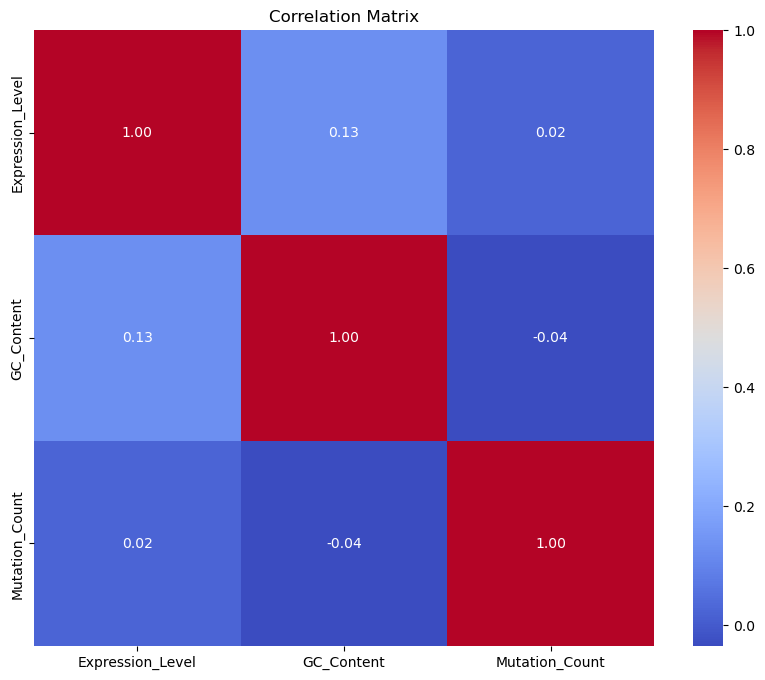

In [13]:
plt.figure(figsize=(10, 8))
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [14]:
categorical_cols = data.select_dtypes(include=["object", "category"]).columns
print("\nCategorical Columns:")
print(categorical_cols)


Categorical Columns:
Index(['Gene_ID', 'Chromosome'], dtype='object')


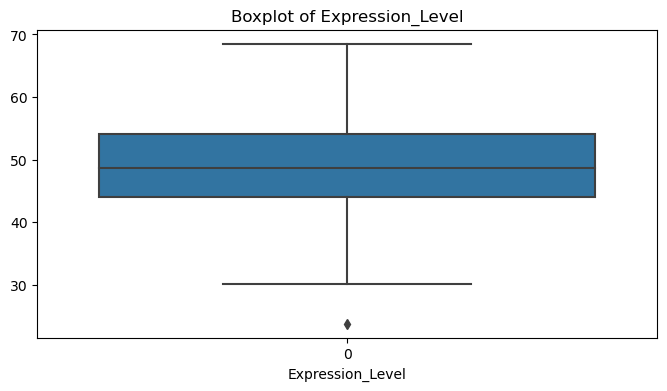

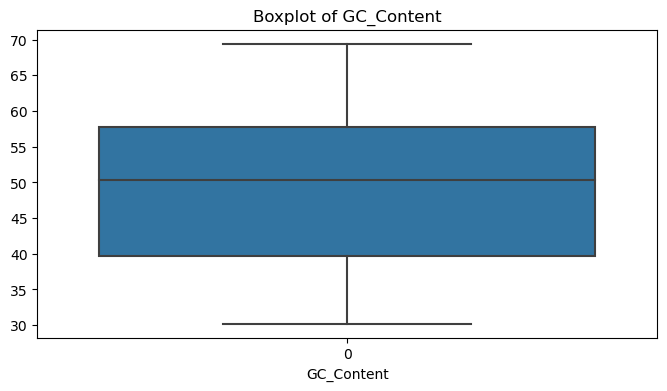

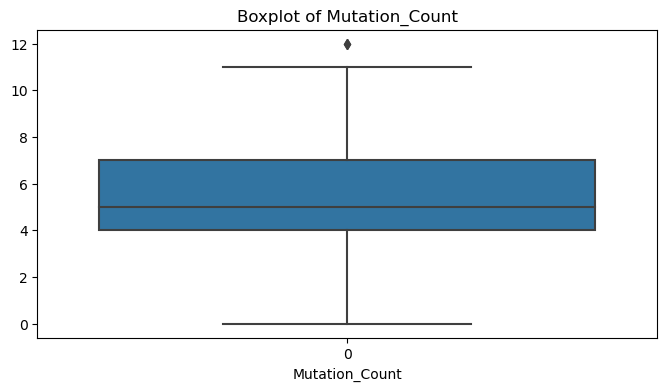

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

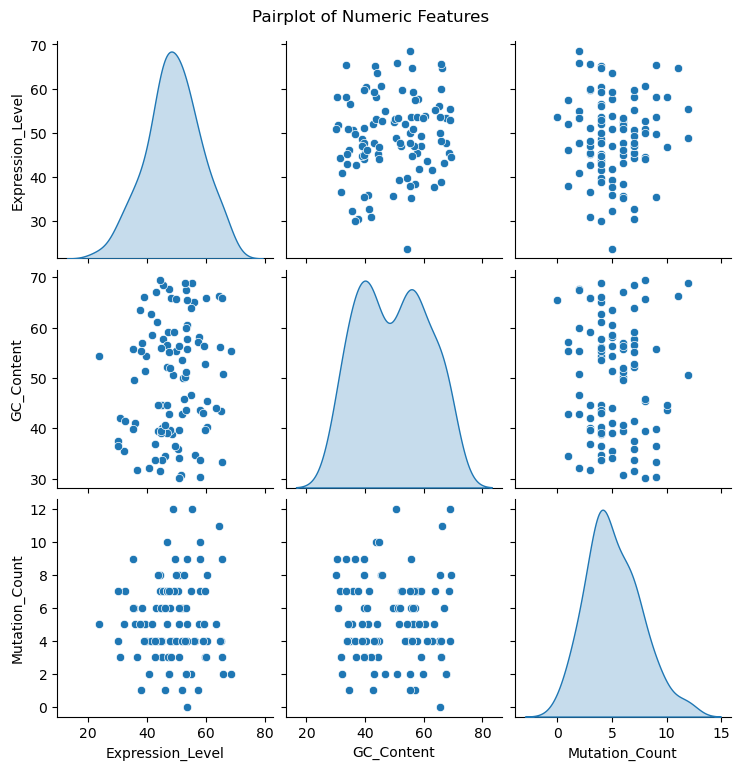

In [16]:
# Advanced visualization: Pairplot for numeric columns
if len(numeric_cols) > 1:
    sns.pairplot(data[numeric_cols], diag_kind="kde")
    plt.suptitle("Pairplot of Numeric Features", y=1.02)
    plt.show()

In [17]:
# Detecting skewness in numeric data
skewness = data[numeric_cols].skew()
print("\nSkewness of Numeric Columns:")
print(skewness)


Skewness of Numeric Columns:
Expression_Level   -0.177948
GC_Content          0.072570
Mutation_Count      0.508638
dtype: float64


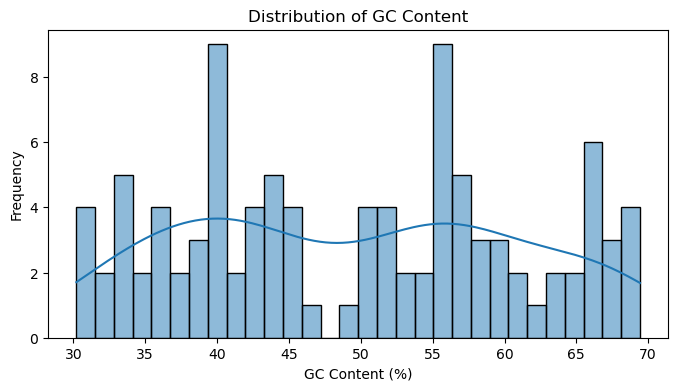

In [18]:
if "GC_Content" in data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data["GC_Content"], kde=True, bins=30)
    plt.title("Distribution of GC Content")
    plt.xlabel("GC Content (%)")
    plt.ylabel("Frequency")
    plt.show()

In [19]:
print("Advanced EDA for Genomic Data Analysis: Identifying Genetic Variations Through Visualization  completed.")

Advanced EDA for Genomic Data Analysis: Identifying Genetic Variations Through Visualization  completed.
